In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!pip install wget 
import wget

In [2]:
#importing data
wget.filename_from_url('https://github.com/LambdaSchool/DS-Unit-2-Applied-Modeling/blob/master/data/caterpillar/caterpillar-tube-pricing.zip')

'caterpillar-tube-pricing.zip'

In [3]:
ls *.zip

 Volume in drive C has no label.
 Volume Serial Number is FAF5-51B9

 Directory of C:\Users\tako\Desktop\Lambda SChool Class\DS-Unit-2-Applied-Modeling-master\module1-log-linear-regression

08/06/2019  11:14 PM           823,789 caterpillar-tube-pricing.zip
05/12/2018  10:28 PM           812,858 data.zip
               2 File(s)      1,636,647 bytes
               0 Dir(s)  576,758,173,696 bytes free


In [4]:
from glob import glob

In [5]:
import pandas as pd

for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    print(path, df.shape)

competition_data\bill_of_materials.csv (21198, 17)
competition_data\components.csv (2048, 3)
competition_data\comp_adaptor.csv (25, 20)
competition_data\comp_boss.csv (147, 15)
competition_data\comp_elbow.csv (178, 16)
competition_data\comp_float.csv (16, 7)
competition_data\comp_hfl.csv (6, 9)
competition_data\comp_nut.csv (65, 11)
competition_data\comp_other.csv (1001, 3)
competition_data\comp_sleeve.csv (50, 10)
competition_data\comp_straight.csv (361, 12)
competition_data\comp_tee.csv (4, 14)
competition_data\comp_threaded.csv (194, 32)
competition_data\specs.csv (21198, 11)
competition_data\test_set.csv (30235, 8)
competition_data\train_set.csv (30213, 8)
competition_data\tube.csv (21198, 16)
competition_data\tube_end_form.csv (27, 2)
competition_data\type_component.csv (29, 2)
competition_data\type_connection.csv (14, 2)
competition_data\type_end_form.csv (8, 2)


In [6]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')
trainval.head(10)

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983


In [7]:
test.head(10)

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25
5,6,TA-00001,S-0066,2013-06-23,0,0,Yes,50
6,7,TA-00001,S-0066,2013-06-23,0,0,Yes,100
7,8,TA-00001,S-0066,2013-06-23,0,0,Yes,250
8,9,TA-00003,S-0066,2013-07-07,0,0,Yes,1
9,10,TA-00003,S-0066,2013-07-07,0,0,Yes,2


In [8]:
trainval['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
test['quote_date'] = pd.to_datetime(trainval['quote_date'], infer_datetime_format=True)
trainval['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [9]:
test['quote_date'].describe()

count                   30213
unique                   1781
top       2013-10-01 00:00:00
freq                     2877
first     1982-09-22 00:00:00
last      2017-01-01 00:00:00
Name: quote_date, dtype: object

In [10]:
#checking test df for different tube assemblies
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
test_tube_assemblies = test['tube_assembly_id'].unique()
len(trainval_tube_assemblies), len(test_tube_assemblies)

(8855, 8856)

In [11]:
set(trainval_tube_assemblies), set(test_tube_assemblies)

({'TA-01570',
  'TA-05937',
  'TA-08295',
  'TA-09124',
  'TA-17187',
  'TA-20039',
  'TA-19613',
  'TA-01098',
  'TA-13693',
  'TA-20287',
  'TA-15178',
  'TA-18018',
  'TA-14934',
  'TA-18881',
  'TA-06277',
  'TA-03148',
  'TA-13655',
  'TA-05106',
  'TA-16560',
  'TA-00674',
  'TA-01791',
  'TA-00497',
  'TA-13442',
  'TA-03985',
  'TA-02148',
  'TA-18329',
  'TA-00356',
  'TA-01773',
  'TA-18689',
  'TA-07290',
  'TA-05381',
  'TA-04133',
  'TA-16100',
  'TA-19316',
  'TA-02500',
  'TA-12573',
  'TA-17998',
  'TA-10357',
  'TA-09716',
  'TA-21090',
  'TA-10192',
  'TA-02553',
  'TA-16456',
  'TA-19011',
  'TA-09399',
  'TA-00403',
  'TA-19722',
  'TA-16299',
  'TA-07899',
  'TA-14622',
  'TA-03783',
  'TA-11061',
  'TA-05522',
  'TA-02490',
  'TA-17933',
  'TA-17370',
  'TA-13225',
  'TA-19188',
  'TA-08633',
  'TA-09987',
  'TA-00400',
  'TA-07166',
  'TA-05350',
  'TA-02475',
  'TA-11098',
  'TA-04297',
  'TA-06584',
  'TA-04876',
  'TA-08425',
  'TA-00696',
  'TA-09547',
  'TA-

In [12]:
trainval_tube_assemblies

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42
)
len(train_tube_assemblies), len(val_tube_assemblies)

(6641, 2214)

In [14]:
set(train_tube_assemblies) & set(val_tube_assemblies)

set()

In [15]:
train = trainval[trainval['tube_assembly_id'].isin(train_tube_assemblies)]
val = trainval[trainval['tube_assembly_id'].isin(val_tube_assemblies)]
train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [16]:
len(train) + len(val) == len(trainval)

True

In [17]:
#baseline
train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,22628.000000,22628.000000,22628.000000,22628.000000
mean,116.908830,2.130193,38.267677,13.450500
std,1678.532065,13.262875,71.313125,27.622252
min,0.000000,0.000000,1.000000,0.523027
25%,0.000000,0.000000,2.000000,3.855934
50%,0.000000,0.000000,10.000000,6.507236
75%,2.000000,0.000000,40.000000,13.451951
max,150000.000000,535.000000,2500.000000,1000.000000


In [18]:
train.describe(exclude='number')

,tube_assembly_id,supplier,quote_date,bracket_pricing
count,22628,22628,22628,22628
unique,6641,52,1510,2
top,TA-04750,S-0066,2013-10-01 00:00:00,Yes
freq,12,15391,2077,19699
first,NaN,NaN,1987-04-10 00:00:00,NaN
last,NaN,NaN,2017-01-01 00:00:00,NaN


In [19]:
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [20]:
from sklearn.metrics import mean_squared_log_error

In [21]:
target = 'cost'
y_train = train[target]
y_val = val[target]
y_pred = np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9418101276064408


In [22]:
from sklearn.metrics import r2_score
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation R^2, Mean Baseline: -4.701447715138585e-06


In [23]:
# deleope a first moodel to compare to baseline
train['cost'].mean()

13.450499769517025

In [24]:
train.groupby('quantity')['cost'].mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [25]:
features = ['quantity']
X_train = train[features]
X_val = val[features]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
r2 = model.score(X_val, y_val)
print('Validation R^2', r2)

Validation R^2 0.08879518736792147


In [26]:
y_pred = model.predict(X_val)
print(f'Validation RMSLE, Random Forest with {features}')
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6908805822519187


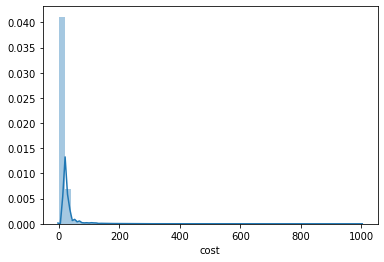

In [27]:
#Log transform regression target with right-skewed distrobution
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

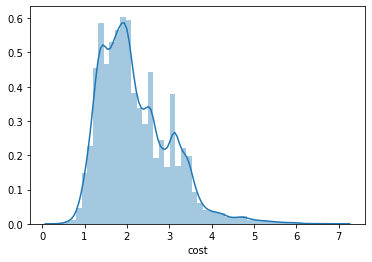

In [28]:
y_train_log = np.log1p(y_train)
sns.distplot(y_train_log);

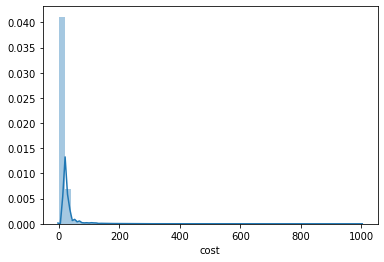

In [29]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [30]:
all(np.isclose(y_train_log_exp, y_train))

True

In [31]:
#Refit MOdel with log-transformed data
model.fit(X_train, y_train_log)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.622925465880199

In [32]:
#RMSLE with original targets = RMSE with log-transformed targets
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_val_log = np.log1p(y_val)
rmse(y_val_log, y_pred_log)

0.622925465880199

In [33]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [34]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [35]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_date_year', 'quote_date_month']


In [36]:
X_train = train_wrangled[features]
X_val = val_wrangled[features]

import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3950176959701

In [37]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.3950176959701

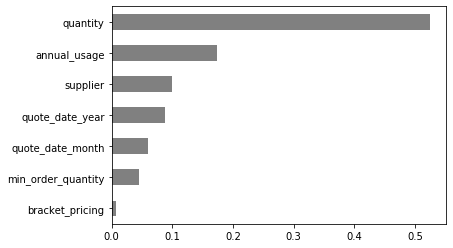

In [38]:
#feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh(color='grey');

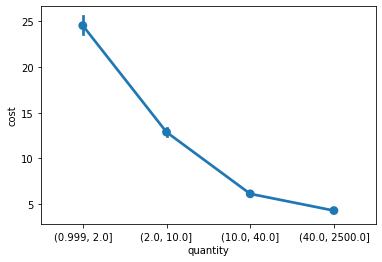

In [39]:
quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)
sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

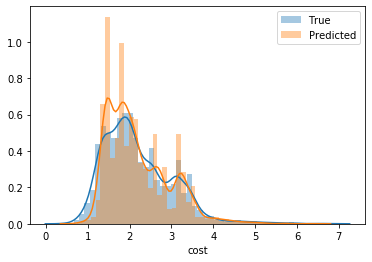

In [40]:
import matplotlib.pyplot as plt
sns.distplot(y_val_log, label='True')
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [41]:
#feature engineering with relational data
for path in glob('competition_data/*.csv'):
    df = pd.read_csv(path)
    shared_columns = set(df.columns) & set(train.columns)
    if shared_columns:
        print(path, df.shape)
        print(df.columns.tolist(), '\n')

competition_data\bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data\specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'spec10'] 

competition_data\test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data\train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data\tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end

In [42]:
tube = pd.read_csv('competition_data/tube.csv')

In [43]:
tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [44]:
tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-10277,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [45]:
def wrangle(X):
    X = X.copy()
    
    # Engineer date features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X = X.drop(columns='quote_date')
    
    # Merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    X = X.merge(tube, how='left')
    
    # Drop tube_assembly_id because our goal is to predict unknown assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X


train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [46]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [47]:
train_wrangled.shape, val_wrangled.shape

((22628, 23), (7585, 23))

In [48]:
train_wrangled.head(10)

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_date_year,quote_date_month,material_id,diameter,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
5,S-0066,0,0,Yes,50,3.291176,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
6,S-0066,0,0,Yes,100,3.149291,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
7,S-0066,0,0,Yes,250,3.065829,2013,7,SP-0019,6.35,...,19.05,N,N,N,N,EF-008,EF-008,0,0,0
8,S-0066,0,0,Yes,1,28.374220,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0
9,S-0066,0,0,Yes,2,16.514303,2013,9,SP-0029,19.05,...,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [49]:
X_train = train_wrangled.drop(columns=target)
X_val = val_wrangled.drop(columns=target)

In [50]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train_log)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
               

In [51]:
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)

0.3067473950776893

In [54]:
test_wrangled = wrangle(test)
X_test = test_wrangled.drop(columns='id')
all(X_test.columns == X_train.columns)

True

In [55]:
X_test.fillna(X_train.mean(), inplace=True)

In [56]:
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('submission-01.csv', index=False)